In [12]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the needed api key
from config import weather_api_key

# We need to get our cities from somewhere
from citipy import citipy

# Defining the output filepath
output_data = "output_data/cities.csv"

# Define lats and longs
latRange = (-90, 90)
lonRange = (-180, 180)

In [5]:
# Create empty lists to fill
latLng = []
cities = []

# Get random lats and longs
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Zip them together in the latLng list
latLng = zip(lat, lng)

# Match cities with the lats and longs
for x in latLng:
    city = citipy.nearest_city(x[0],x[1]).city_name

    if city not in cities:
        cities.append(city)

len(cities)

635

In [6]:
print(cities)

['pandan', 'ushuaia', 'aklavik', 'tabiauea', 'kontagora', 'butaritari', 'katsuura', 'punta arenas', 'cape town', 'predivinsk', 'kruisfontein', 'vila velha', 'beringovskiy', 'bethel', 'bredasdorp', 'vaini', 'sinnamary', 'roma', 'paamiut', 'creel', 'warqla', 'barrow', 'bluff', 'harper', 'ossora', 'anahuac', 'udachnyy', 'kavaratti', 'kaitangata', 'ponta do sol', 'cidreira', 'vostok', 'tawkar', 'vilcun', 'hilo', 'svetlyy', 'yellowknife', 'mount isa', 'rikitea', 'kandrian', 'dargaville', 'mataura', 'waingapu', 'kantang', 'saldanha', 'grand river south east', 'japura', 'sagar', 'shellbrook', 'isangel', 'ribeira grande', 'heswall', 'tiksi', 'cabo san lucas', 'laguna', 'portland', 'verkhoyansk', 'fortuna', 'mahajanga', 'arraial do cabo', 'half moon bay', 'bengkulu', 'batagay-alyta', 'avarua', 'attawapiskat', 'busselton', 'kodiak', 'zlobin', 'luderitz', 'albany', 'ourossogui', 'amderma', 'new norfolk', 'nizwa', 'taolanaro', 'mahebourg', 'bilibino', 'ceres', 'carupano', 'faanui', 'tasiilaq', 'al

- Temperature (F) vs. Latitude
 
- Humidity (%) vs. Latitude
 
- Cloudiness (%) vs. Latitude

- Wind Speed (mph) vs. Latitude

In [8]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

response = requests.get(query_url + cities[0]).json()

In [13]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 14.05, 'lon': 124.17},
 'dt': 1587158093,
 'id': 1695546,
 'main': {'feels_like': 84.24,
          'grnd_level': 1013,
          'humidity': 80,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 81.32,
          'temp_max': 81.32,
          'temp_min': 81.32},
 'name': 'Pandan',
 'rain': {'3h': 0.24},
 'sys': {'country': 'PH', 'sunrise': 1587158876, 'sunset': 1587203817},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 111, 'speed': 12.73}}


I think this one is bad 

In [17]:
# # Create some empty lists
# lat=[]
# lon=[]
# temp=[]
# humid=[]
# cloud=[]
# windsp=[]

# for city in cities:
#     response = requests.get(query_url + city).json()

#     # Print a message so we can keep track of what it's doing
#     print(f"Gathering information on {city}")

#     try:
#         # Add the info to the correct list
#         lat.append(response["coord"]["lat"])
#         lon.append(response["coord"]["lon"])
#         temp.append(response["main"]["temp"])
#         humid.append(response["main"]["humidity"])
#         cloud.append(response["clouds"]["all"])
#         windsp.append(response["wind"]["speed"])

#     except KeyError: 
#         print(f"There was an error processing {city}")

nformation on hermanus
Gathering information on deputatskiy
Gathering information on saskylakh
Gathering information on illoqqortoormiut
There was an error processing illoqqortoormiut
Gathering information on port lincoln
Gathering information on esperance
Gathering information on providencia
Gathering information on saint george
Gathering information on richards bay
Gathering information on kabinda
Gathering information on banda aceh
Gathering information on east london
Gathering information on nikolskoye
Gathering information on reconquista
Gathering information on bathsheba
Gathering information on husavik
Gathering information on lorengau
Gathering information on san cristobal
Gathering information on puerto cortes
There was an error processing puerto cortes
Gathering information on cap-aux-meules
Gathering information on broken hill
Gathering information on tuatapere
Gathering information on itoman
Gathering information on nizhniy kuranakh
Gathering information on monrovia
Gatheri

In [34]:
weather_dict = {
    "City" : cities,
    "Latitude" : None,
    "Temperature (F)" : None,
    "Humidity" : None,
    "Cloudiness" : None,
    "Wind Speed" : None
}

weather_df = pd.DataFrame(weather_dict).set_index("City")

test_df = weather_df.head(30)
weather_df.head()

,Latitude,Temperature (F),Humidity,Cloudiness,Wind Speed
City,,,,,
pandan,None,None,None,None,None
ushuaia,None,None,None,None,None
aklavik,None,None,None,None,None
tabiauea,None,None,None,None,None
kontagora,None,None,None,None,None


In [39]:
x=1
for i, row in weather_df.iterrows():
    city = i

    try:
        # Make the request and print which place it's looking up
        response = requests.get(query_url + city).json()
        print(f"Gathering information for city number {x}, {i}")
        x+=1
        try:
            # If there was a result, add it to the df
            if response and len(response):
                weather_df.loc[i, "Latitude"] = response["coord"]["lat"]
                weather_df.loc[i, "Temperature (F)"] = response["main"]["temp"]
                weather_df.loc[i, "Humidity"] = response["main"]["humidity"]
                weather_df.loc[i, "Cloudiness"] = response["clouds"]["all"]
                weather_df.loc[i, "Wind Speed"] = response["wind"]["speed"]

        except KeyError:
            print("Missing values....skipping")


    except KeyError:
        print("index can't be found....skipping")


pa
Gathering information for city number 266, camacha
Gathering information for city number 267, tianpeng
Gathering information for city number 268, santiago
Gathering information for city number 269, lagoa
Gathering information for city number 270, isiro
Gathering information for city number 271, malabo
Gathering information for city number 272, kamenka
Gathering information for city number 273, balvi
Gathering information for city number 274, hay river
Gathering information for city number 275, erzincan
Gathering information for city number 276, mpika
Gathering information for city number 277, severo-kurilsk
Gathering information for city number 278, camiri
Gathering information for city number 279, monki
Gathering information for city number 280, kizema
Gathering information for city number 281, nakamura
Gathering information for city number 282, lakes entrance
Gathering information for city number 283, taybad
Gathering information for city number 284, kabo
Gathering information for

In [40]:
weather_df.head()

,Latitude,Temperature (F),Humidity,Cloudiness,Wind Speed
City,,,,,
pandan,14.05,81.61,77,47,11.72
ushuaia,-54.8,52.92,66,40,13.87
aklavik,68.22,23,85,75,8.05
tabiauea,None,None,None,None,None
kontagora,10.4,96.44,21,24,3.65


In [41]:
weather_df = weather_df.dropna()

In [194]:
weather_df = weather_df.rename(columns= {"Humidity": "Humidity (%)", "Cloudiness": "Cloudiness (%)", "Wind Speed":"Wind Speed (MPH)"})

In [195]:
weather_df["Latitude"].describe()

count     589.00
unique    578.00
top        46.43
freq        2.00
Name: Latitude, dtype: float64

In [196]:
test_df.head(30)

,Latitude,Temperature (F),Humidity,Cloudiness,Wind Speed
City,,,,,
pandan,14.05,81.61,77,47,11.72
ushuaia,-54.8,52.92,66,40,13.87
aklavik,68.22,23,85,75,8.05
tabiauea,None,None,None,None,None
kontagora,10.4,96.44,21,24,3.65
butaritari,3.07,82.04,78,98,14.43
katsuura,35.13,57.99,65,4,7
punta arenas,-53.15,48.13,57,57,14.99
cape town,-33.93,70.81,40,5,4.7


In [173]:
# Create a function to make scatter plots
# Variables are : dataframe name, x_axis, y_axis, hemisphere, filename
def plot(df, x, y, hem, name):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{hem} {x} v {y}")
    plt.savefig(f"output_data/{name}.png")
    plt.show()


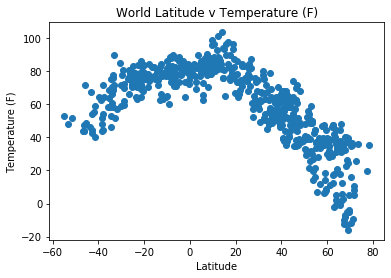

In [197]:
plot(weather_df, "Latitude", "Temperature (F)", "World", "latTemp")

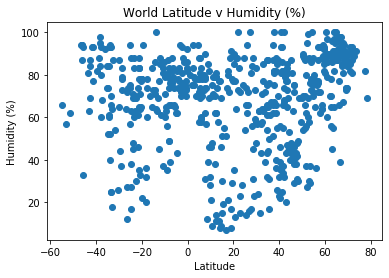

In [198]:
plot(weather_df, "Latitude", "Humidity (%)", "World", "latHum")

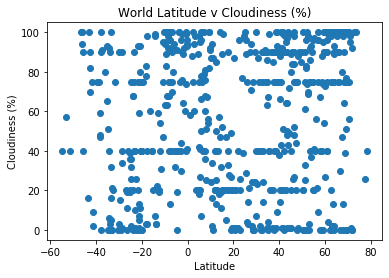

In [199]:
plot(weather_df, "Latitude", "Cloudiness (%)", "World", "latCloud")

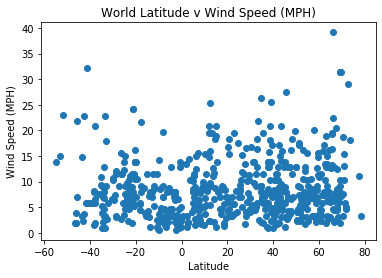

In [200]:
plot(weather_df, "Latitude", "Wind Speed (MPH)", "World", "latWind")

## Northern and Southern Hemispheres

In [201]:
# Separate out the data
north_df = weather_df[weather_df["Latitude"] > 0]
south_df = weather_df[weather_df["Latitude"] < 0]

- Northern Hemisphere - Temperature (F) vs. Latitude
- Southern Hemisphere - Temperature (F) vs. Latitude
- Northern Hemisphere - Humidity (%) vs. Latitude
- Southern Hemisphere - Humidity (%) vs. Latitude
- Northern Hemisphere - Cloudiness (%) vs. Latitude
- Southern Hemisphere - Cloudiness (%) vs. Latitude
- Northern Hemisphere - Wind Speed (mph) vs. Latitude
- Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [202]:
def linreg(df, x, y, a, b):

    x_axis = pd.to_numeric(df[x])
    y_axis = pd.to_numeric(df[y])

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    predictions = x_axis * slope + intercept
    line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
    plt.plot(x_axis ,predictions,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The correlation between {x} and {y} is {round(rvalue,2)}")

NORTHERN HEMISPHERE
The correlation between Latitude and Temperature (F) is -0.87


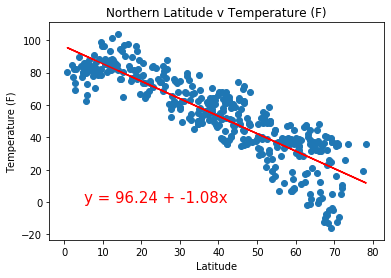

In [203]:
x= "Latitude"
y= "Temperature (F)"
print("NORTHERN HEMISPHERE")
linreg(north_df, x, y, 5, 0)
plot(north_df, x, y, "Northern", "northLatTemp")



SOUTHERN HEMISPHERE
The correlation between Latitude and Temperature (F) is 0.72


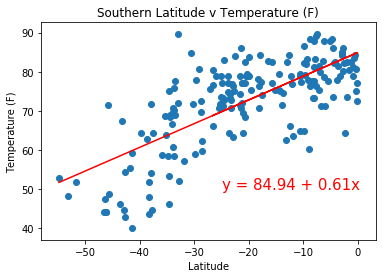

In [204]:
x= "Latitude"
y= "Temperature (F)"
print("SOUTHERN HEMISPHERE")
linreg(south_df, x, y, -25, 50)
plot(south_df, x, y, "Southern", "southLatTemp")

NORTHERN HEMISPHERE
The correlation between Latitude and Humidity (%) is 0.32


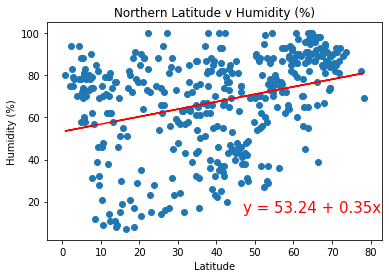

In [205]:
x= "Latitude"
y= "Humidity (%)"
print("NORTHERN HEMISPHERE")
linreg(north_df, x, y, 47, 15)
plot(north_df, x, y, "Northern", "northLatHum")

SOUTHERN HEMISPHERE
The correlation between Latitude and Humidity (%) is 0.03


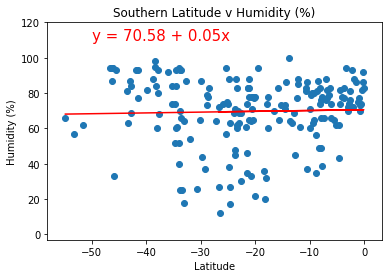

In [206]:
x= "Latitude"
y= "Humidity (%)"
print("SOUTHERN HEMISPHERE")
linreg(south_df, x, y, -50, 110)
plt.ylim(-3,120)
plot(south_df, x, y, "Southern", "southLatHum")

NORTHERN HEMISPHERE
The correlation between Latitude and Cloudiness (%) is 0.18


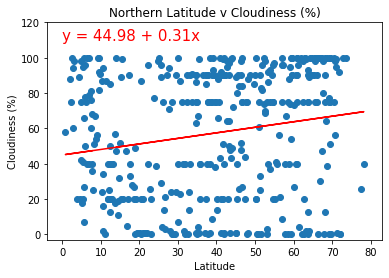

In [207]:
x= "Latitude"
y= "Cloudiness (%)"
print("NORTHERN HEMISPHERE")
linreg(north_df, x, y, 0, 110)
plt.ylim(-3,120)
plot(north_df, x, y, "Northern", "northLatCloud")

SOUTHERN HEMISPHERE
The correlation between Latitude and Cloudiness (%) is 0.21


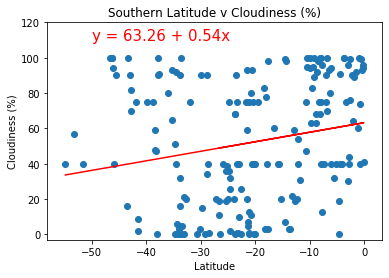

In [208]:
x= "Latitude"
y= "Cloudiness (%)"
print("SOUTHERN HEMISPHERE")
linreg(south_df, x, y, -50, 110)
plt.ylim(-3,120)
plot(south_df, x, y, "Southern", "southLatCloud")

NORTHERN HEMISPHERE
The correlation between Latitude and Wind Speed (MPH) is 0.1


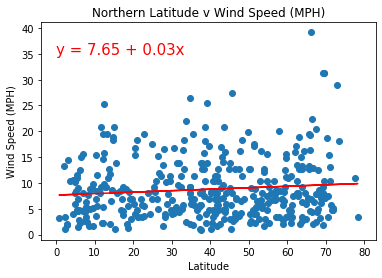

In [209]:
x= "Latitude"
y= "Wind Speed (MPH)"
print("NORTHERN HEMISPHERE")
linreg(north_df, x, y, 0, 35)
plot(north_df, x, y, "Northern", "northLatWind")

SOUTHERN HEMISPHERE
The correlation between Latitude and Wind Speed (MPH) is -0.27


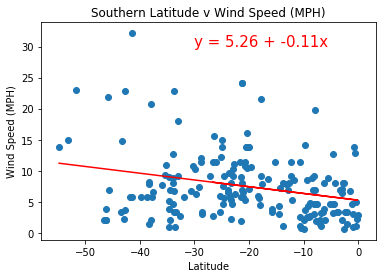

In [210]:
x= "Latitude"
y= "Wind Speed (MPH)"
print("SOUTHERN HEMISPHERE")
linreg(south_df, x, y, -30, 30)
plot(south_df, x, y, "Southern", "southLatWind")

In [212]:
weather_df.to_csv(output_data, index=True, header=True)